In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [213]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

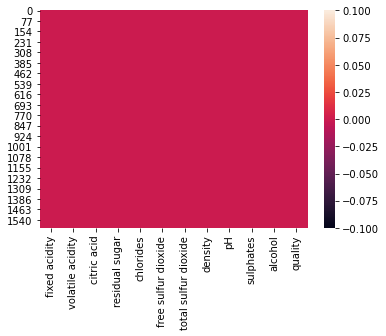

In [214]:
sns.heatmap(data.isnull())

As i can see there are no missing data in there dataset, i will continue with the EDA.

In [215]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1. As per count also, I confirmed that there are no missing values.
2. Residual sugar, Chlorides, Free Sulfur dioxide, sulphates. These variable have considerable gap between 75th% and max values, meaning they are right skewed. 
3. I will remove the outliers to overcome the problem of skewness in the dataset.
4. As i can see the scales of variable is having big difference, to resolve this problem, i will use scaling technique and do futher processing.

In [216]:
from scipy.stats import zscore
z=np.abs(zscore(data))

threshold=3
print(np.where(z>3))

data_new=data[(z<3).all(axis=1)]
data_new.shape

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

(1451, 12)

After removing outliers i am loosing 4% data which acceptable as statndard practice.

In [217]:
data_new['quality'].value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

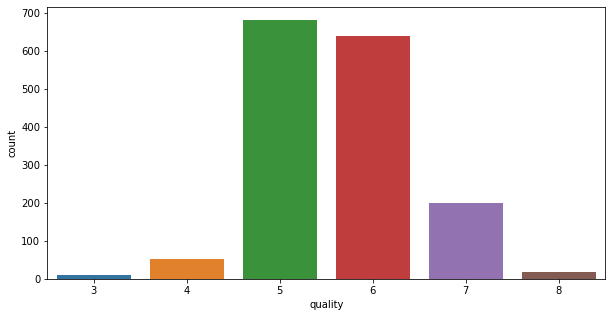

In [218]:
plt.subplots(figsize=(10,5))
sns.countplot(x='quality', data=data)

Majority of quality rating is 5 and 6. To be a good quality wine, it should have rating minimum 7 or above. Rating 7 or above having only 201 wines out of 1451 wines. While doing train test split i will bifurcate them into good and bad according to their ratings.

<AxesSubplot:>

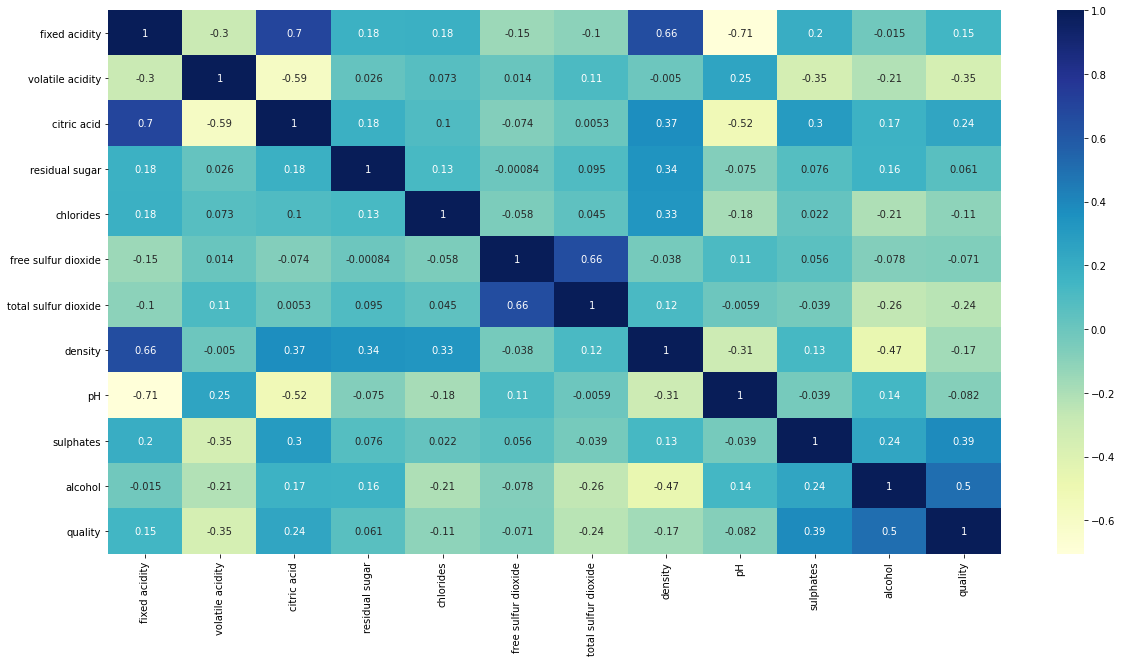

In [219]:
correlation = data_new.corr()
data_new
plt.subplots(figsize=(20,10))
sns.heatmap(data=correlation, annot=True, cmap='YlGnBu')

1. As i can see that there are few variables having problem of multicolinearity, density and citric acid with fixed acidity. But As we have only 10 variables to support in prediction, I will not drop them.
2. When i checked the correlation between target and predictors, I observed that, except alchohol, sulphates and citric acid none other prectors have good correlation with target variable. They do not support the model building process as much as the should are support. 

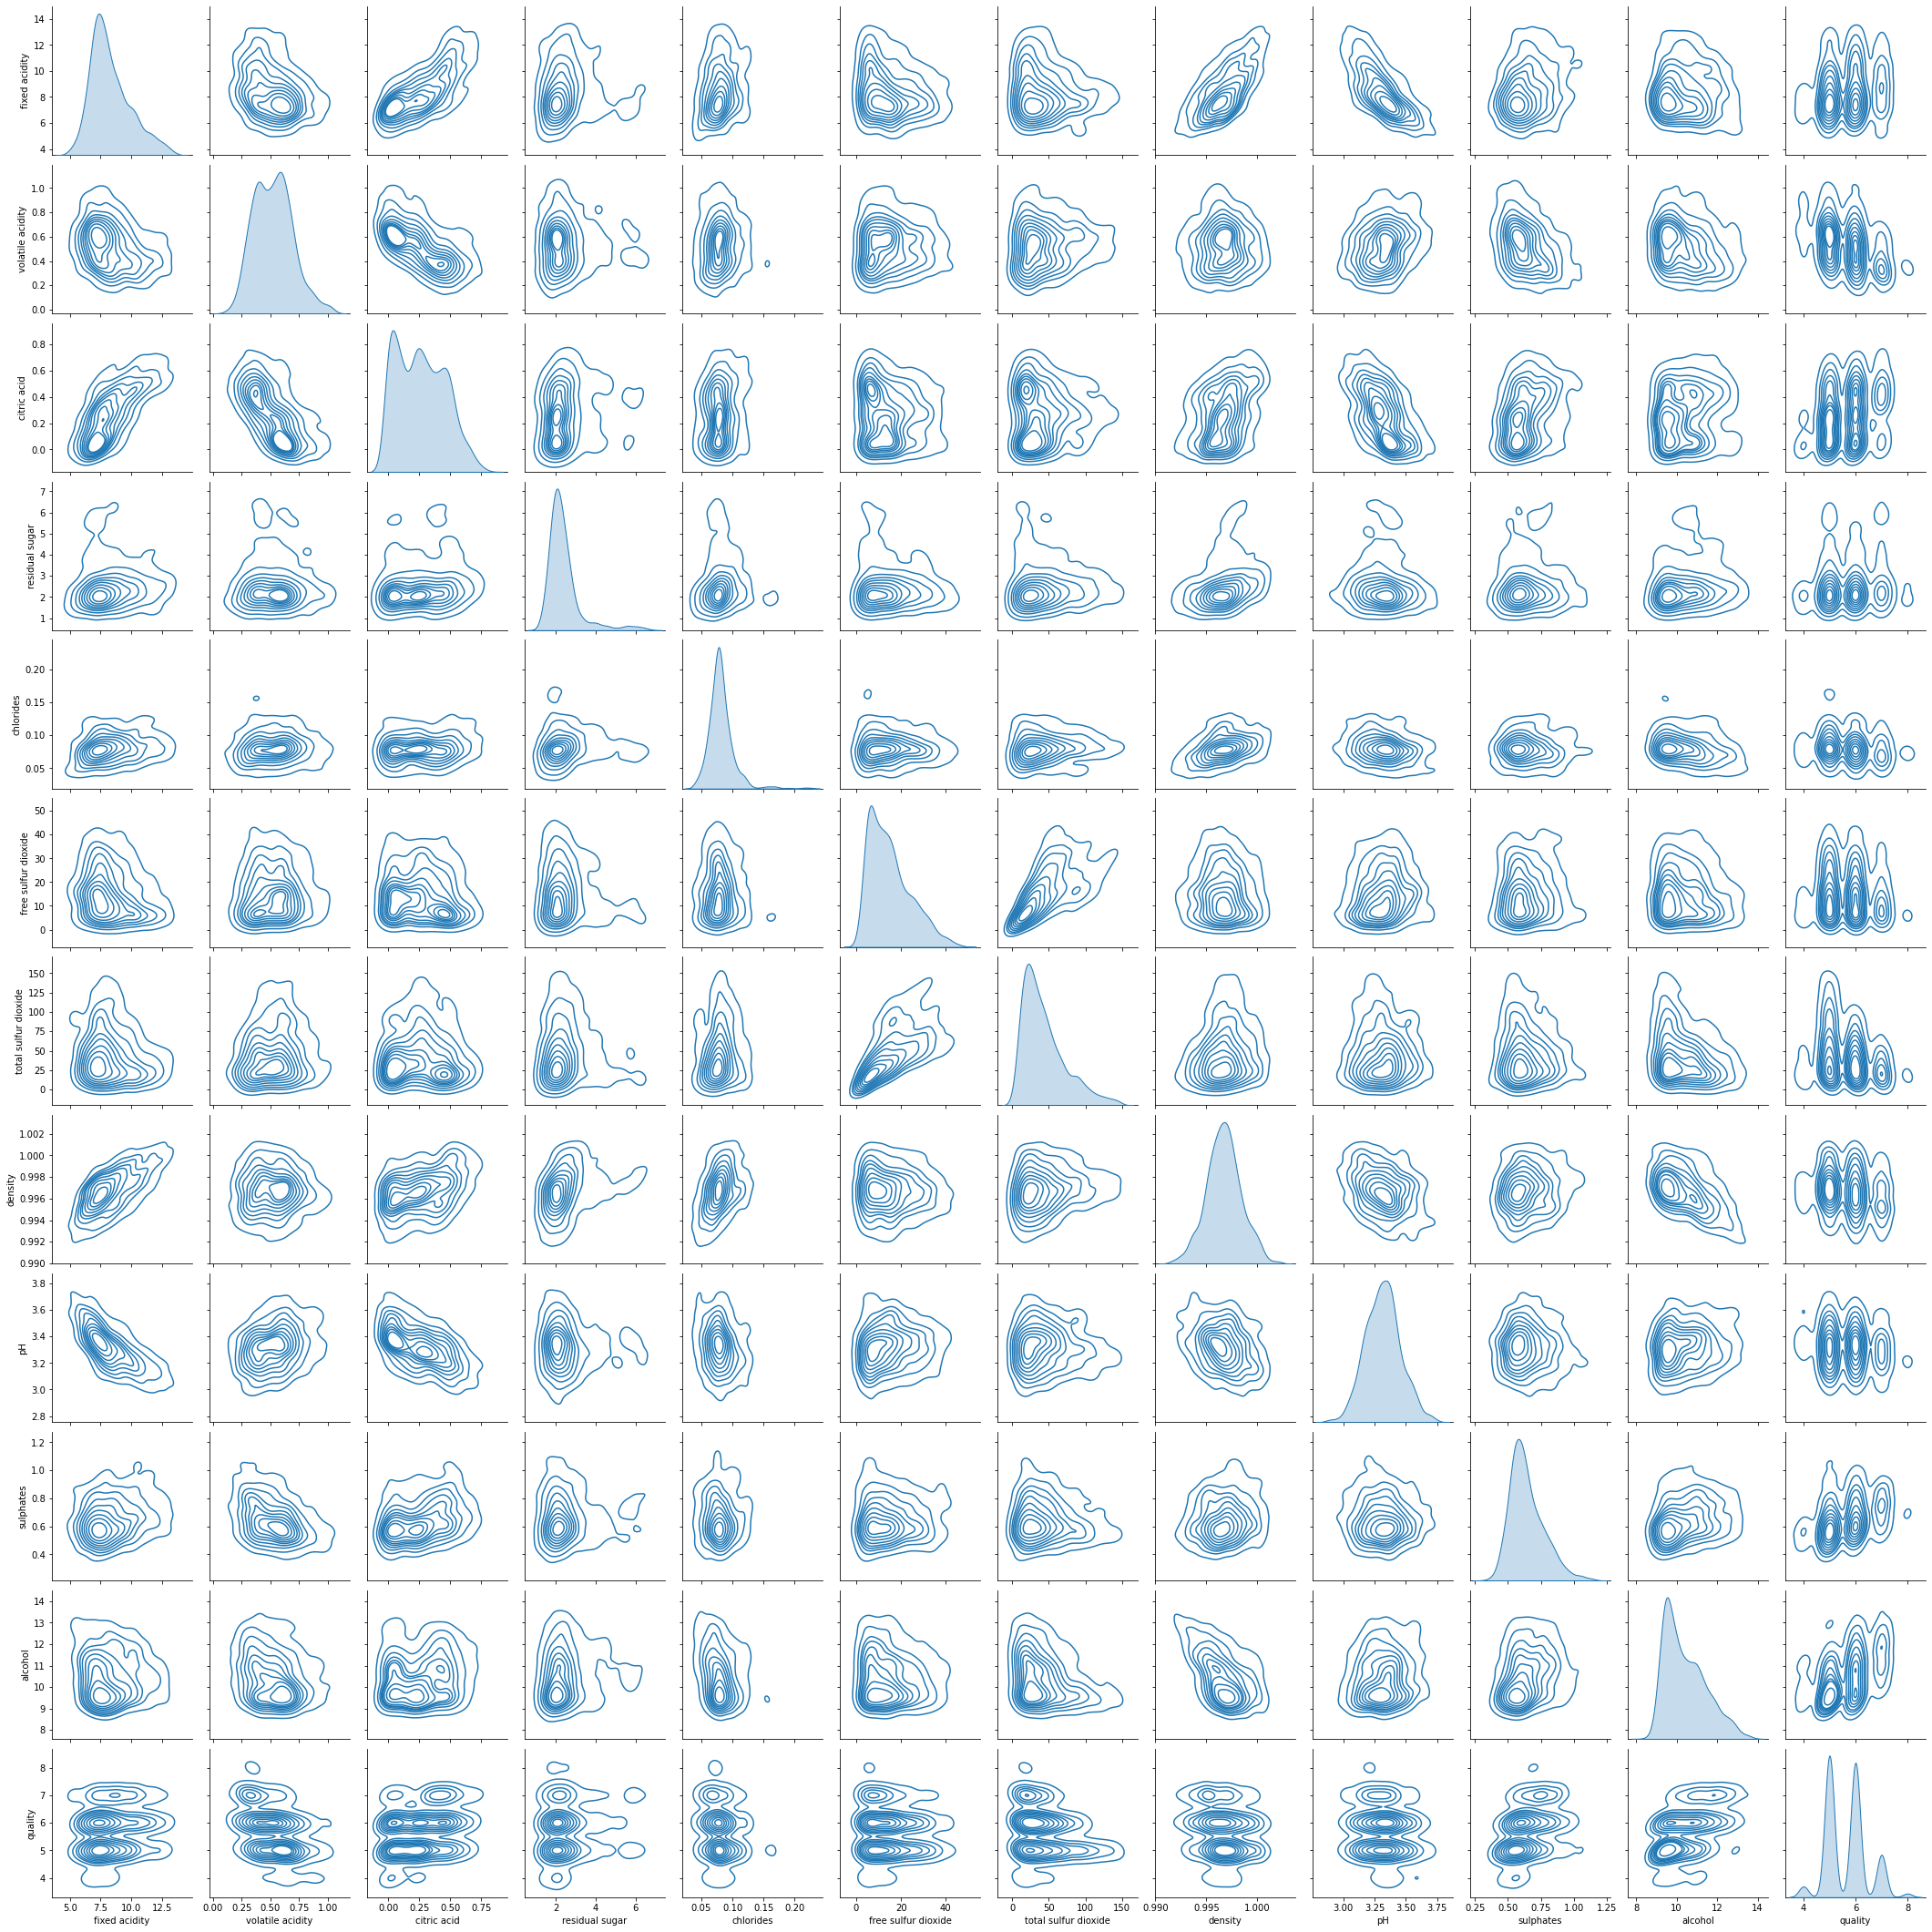

In [220]:
sns.pairplot(data_new, kind="kde")

In [221]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [222]:
data_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

As we can see, by removing I have reduced skewness in dataset, we can compare above two lines of code to see the pre and post outliers removal scenario.

In [223]:
a = data_new.iloc[:,0:11]
a

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [224]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled=scaler.fit_transform(a)
scaled

x = pd.DataFrame(scaled)
x

,0,1,2,3,4,5,6,7,8,9,10
0,-0.552930,1.050914,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,1.375896,-0.636458,-0.999856
1,-0.309900,2.119336,-1.390400,0.246832,0.790825,1.063255,0.790477,0.052390,-0.821951,0.288353,-0.608174
2,-0.309900,1.407054,-1.180831,-0.101284,0.504550,-0.011256,0.348768,0.169009,-0.396561,0.057150,-0.608174
3,1.755851,-1.442071,1.543569,-0.565439,-0.306564,0.203646,0.552634,0.752103,-1.105544,-0.482323,-0.608174
4,-0.552930,1.050914,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,1.375896,-0.636458,-0.999856
...,...,...,...,...,...,...,...,...,...,...,...
1446,-1.282019,0.457346,-0.971261,-0.449401,0.409125,1.815413,0.008992,-1.055489,0.950506,-0.482323,0.077270
1447,-1.464291,0.160562,-0.866477,-0.217323,-0.926828,2.567570,0.246835,-0.927209,1.446794,0.904894,0.762714
1448,-1.221261,-0.076865,-0.709300,-0.101284,-0.258851,1.493059,-0.126918,-0.565690,0.737811,0.827826,0.566873
1449,-1.464291,0.724451,-0.761692,-0.449401,-0.306564,1.815413,0.008992,-0.723125,1.801286,0.519556,-0.216491


Now, as we can see, instead of good and less good(bad) quality we have different ratings and as per them, wines having 7 or more ratings will be considered as good quality and below that will be considered as not good, i will make the two classes accordingly before send the data into train and test split.

In [225]:
data_new['goodquality'] = [1 if x >= 7 else 0 for x in data_new['quality']]

In [226]:
data_new['goodquality'].value_counts()

0    1250
1     201
Name: goodquality, dtype: int64

In [227]:
y = data_new.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1451, dtype: int64

In [228]:
maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxscore:
        maxscore=acc
        maxRS=i
print("Best accuracy score is ", maxscore, 'on Random state ', maxRS)

Best accuracy score is  0.9174311926605505 on Random state  185


With this code I come to know that the best accuracy we can achieve with the Decision Tree classifier is 92.66% and the random state which is ideal for train and test split is 185. Hence now I will use random state as 185 for train test split.

In [229]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=185)

In [230]:
x_train.shape

(1015, 11)

In [231]:
x_test.shape

(436, 11)

In [232]:
y_train.shape

(1015,)

In [233]:
y_test.shape

(436,)

In [234]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),LogisticRegression()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    m_pred=m.predict(x_test)
    print('accuracy_score of',m,"is:")
    print(accuracy_score(y_test,m_pred))
    print(confusion_matrix(y_test,m_pred))
    print(classification_report(y_test,m_pred))
    print("\n")

accuracy_score of DecisionTreeClassifier() is:
0.9105504587155964
[[350  20]
 [ 19  47]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       370
           1       0.70      0.71      0.71        66

    accuracy                           0.91       436
   macro avg       0.83      0.83      0.83       436
weighted avg       0.91      0.91      0.91       436



accuracy_score of SVC() is:
0.8784403669724771
[[365   5]
 [ 48  18]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       370
           1       0.78      0.27      0.40        66

    accuracy                           0.88       436
   macro avg       0.83      0.63      0.67       436
weighted avg       0.87      0.88      0.85       436



accuracy_score of KNeighborsClassifier() is:
0.8600917431192661
[[354  16]
 [ 45  21]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.

In [235]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=10).mean())

0.845602267359471


In [236]:
print(cross_val_score(SVC(),x,y,cv=10).mean())

0.8807746811525743


In [237]:
print(cross_val_score(KNeighborsClassifier(),x,y,cv=10).mean())

0.8483797827113839


In [238]:
print(cross_val_score(GaussianNB(),x,y,cv=10).mean())

0.845592820028342


In [239]:
print(cross_val_score(LogisticRegression(),x,y,cv=10).mean())

0.8780207841284838


When i checked the accuracy scores with CV scores,  SVC() has the least differance which is -1%. Hence Now I will check which parameters are best to use with the SVC Classifier model with the help of hyperparameter tuning.

In [240]:
parameter = {'gamma' : [1,0.1,0.01,0.001],
            'kernel' : ['poly', 'rbf', 'sigmoid'],
            'verbose':[True, False],
            'C': [0.1,1, 10, 100]}

In [241]:
#GSV = GridSearchCV(SVC(),parameter,cv=10)
#GSV.fit(x_train,y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['poly', 'rbf', 'sigmoid'],
                         'verbose': [True, False]})

In [242]:
GSV.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'verbose': True}

In [246]:
#Final_model=DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=8, splitter= 'random')
Final_model=SVC(C=1, gamma=0.1, kernel='rbf', verbose= True, probability=True)
Final_model.fit(x_train,y_train)
Final_model.score(x_train,y_train)
pred=Final_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[LibSVM]87.38532110091744
[[364   6]
 [ 49  17]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       370
           1       0.74      0.26      0.38        66

    accuracy                           0.87       436
   macro avg       0.81      0.62      0.66       436
weighted avg       0.86      0.87      0.85       436



Overall accuracy I achieved is 87%, I also noticed that the f1-score for predicting the good quality is only 38%. The reason behind this is that the data has very less rows for machine learning to learn about good quality. We can also say that the data is imbalanced and we cannot do anything about it.

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [248]:
y_pred_prob=Final_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.08959617, 0.07002213, 0.01869111, 0.04585934, 0.05182183,
       0.02167338, 0.04380992, 0.10925771, 0.20329243, 0.95231411,
       0.13021167, 0.17485532, 0.06529629, 0.12355494, 0.16735427,
       0.04214956, 0.08073928, 0.03545079, 0.03308284, 0.08673192,
       0.03995933, 0.03897355, 0.06589487, 0.0921305 , 0.04549081,
       0.0566346 , 0.04425795, 0.14662478, 0.81411986, 0.05556078,
       0.41541934, 0.06288201, 0.08692974, 0.27946299, 0.06017299,
       0.05066221, 0.16735427, 0.04479821, 0.46549648, 0.05603168,
       0.42165001, 0.06920489, 0.03341002, 0.06060289, 0.0605576 ,
       0.04507561, 0.78609443, 0.0838399 , 0.10468871, 0.04763532,
       0.0336076 , 0.04789194, 0.03535821, 0.09568088, 0.03850632,
       0.02497276, 0.12670586, 0.08310931, 0.05458229, 0.08655355,
       0.07760574, 0.04747285, 0.07833996, 0.67535873, 0.06098919,
       0.14889042, 0.89986978, 0.0675201 , 0.07801824, 0.08663635,
       0.26359381, 0.04546641, 0.08580181, 0.06400416, 0.08774

In [249]:
len(y_pred_prob)

436

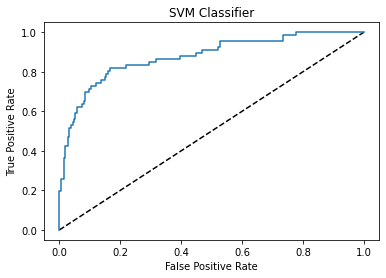

AUC_ROC Score =  0.6206797706797706


In [250]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVM Classifier ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))
print('AUC_ROC Score = ',auc_score)

In [251]:
import joblib
joblib.dump(Final_model,'Red_wine.obj')

['Red_wine.obj']